# This file contains Milestone 1-4
I have edited what is contained in Milestone 2 based on re-evaualtion and work performed during Milestone 3&4 work. Code is commented out, but retained, and additional comments have been made in markdown cells.

# Week 6 - Milestone 1

##### Note: Narrative analysis of the graphs can be found in the submitted file: Week 6 - DSC 550 T302 - RYANLONG - Milestone 1 - 2 of 2

### Data import, review, cleaning

In [1]:
# import libraries / modules
import pandas as pd
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# load data into a dataframe
# DATA SOURCE: https://www.kaggle.com/danofer/skillcraft
data = pd.read_csv('SkillCraft.csv')

In [3]:
#check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (3338, 20)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3338 non-null   int64  
 1   LeagueIndex           3338 non-null   int64  
 2   Age                   3338 non-null   int64  
 3   HoursPerWeek          3338 non-null   int64  
 4   TotalHours            3338 non-null   int64  
 5   APM                   3338 non-null   float64
 6   SelectByHotkeys       3338 non-null   float64
 7   AssignToHotkeys       3338 non-null   float64
 8   UniqueHotkeys         3338 non-null   int64  
 9   MinimapAttacks        3338 non-null   float64
 10  MinimapRightClicks    3338 non-null   float64
 11  NumberOfPACs          3338 non-null   float64
 12  GapBetweenPACs        3338 non-null   float64
 13  ActionLatency         3338 non-null   float64
 14  ActionsInPAC          3338 non-null   float64
 15  TotalMapExplored     

In [5]:
# show top 10 hours played
data.TotalHours.nlargest(10)

1792    1000000
2322      25000
769       20000
1976      18000
2214      10260
7         10000
2138       9000
10         6000
3251       6000
1          5000
Name: TotalHours, dtype: int64

In [6]:
# drop the outliers
data = data.drop(labels=[1792,2322,769,1976],axis=0)

In [7]:
# review age column, mostly under 25
data[["Age"]].describe()

,Age
count,3334.000000
mean,21.651770
std,4.208299
min,16.000000
25%,19.000000
50%,21.000000
75%,24.000000
max,44.000000


In [8]:
# make categorical columns based on age
data.loc[data['Age'] < 25, 'AgeCat' ] = 'Less than 25'
data.loc[data['Age'] >= 25, 'AgeCat' ] = '25 and over'

In [9]:
# review above
B =sum(data.AgeCat.str.count('Less than 25'))
C =sum(data.AgeCat.str.count('25 and over'))
print(B,C)

2635 699


### Data Visualization and analysis

#### Histograms

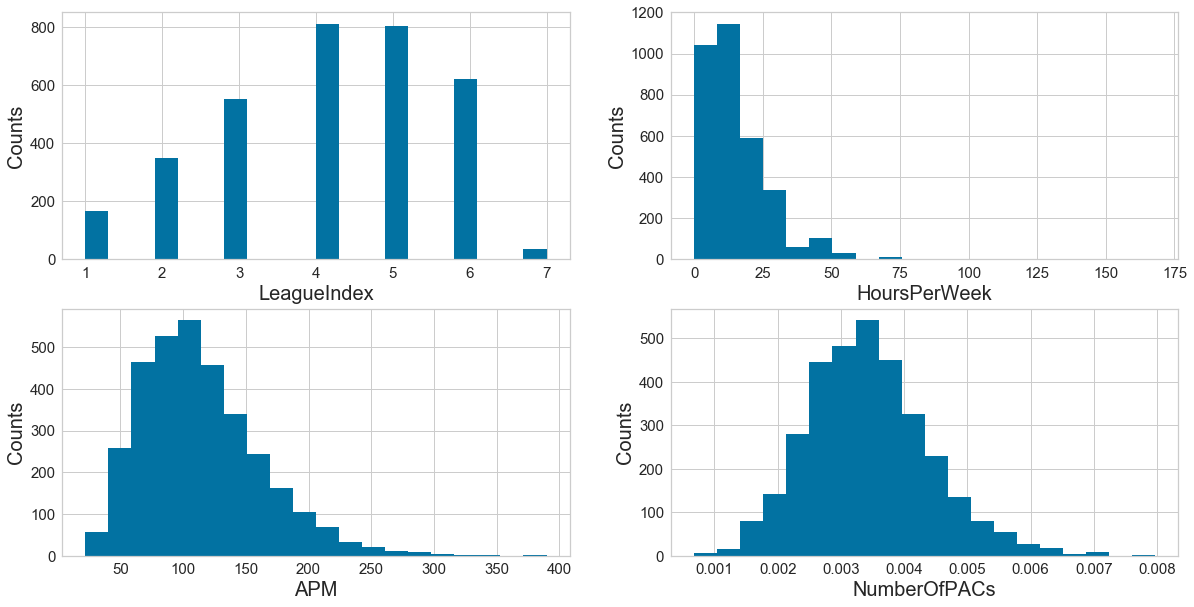

In [10]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['LeagueIndex', 'HoursPerWeek', 'APM', 'NumberOfPACs']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=20)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()

#### Scatter Plot, Total Hours and APM

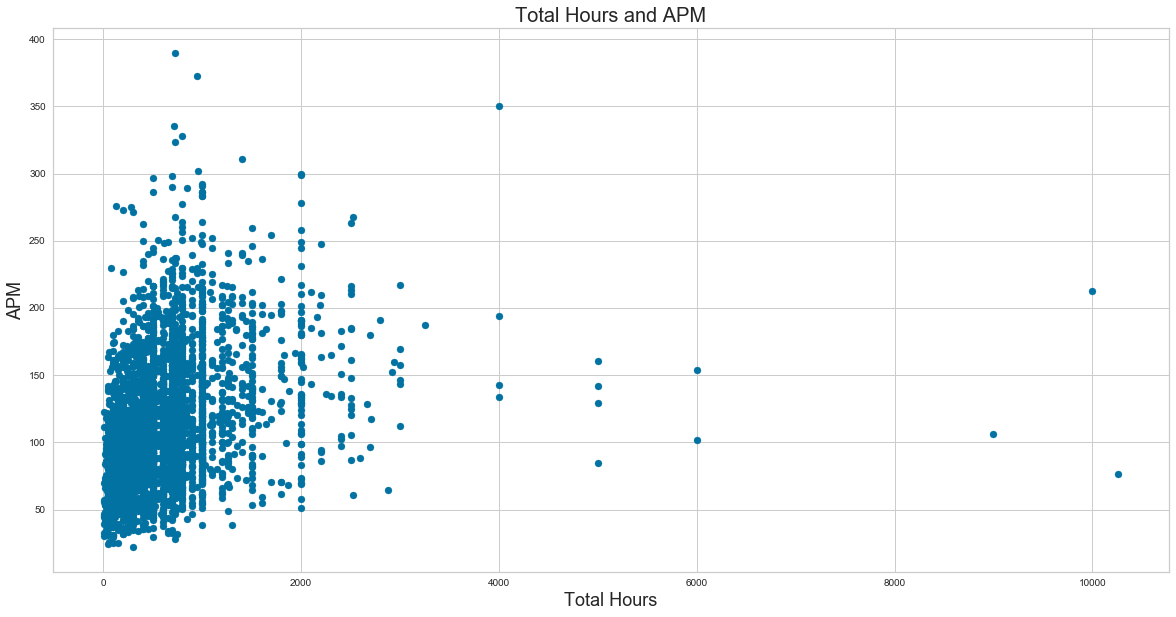

In [11]:
#set x & y
x = data['TotalHours']
y = data['APM']
#labels
plt.title('Total Hours and APM', fontsize=20) #sets title
plt.xlabel('Total Hours', fontsize=18)  #sets x label and size
plt.ylabel('APM', fontsize=18);  #sets y label and size
#plot
plt.scatter(x, y)
plt.show()

#### Box Plot 1, League Index and Action Latency

C:\Users\longr\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


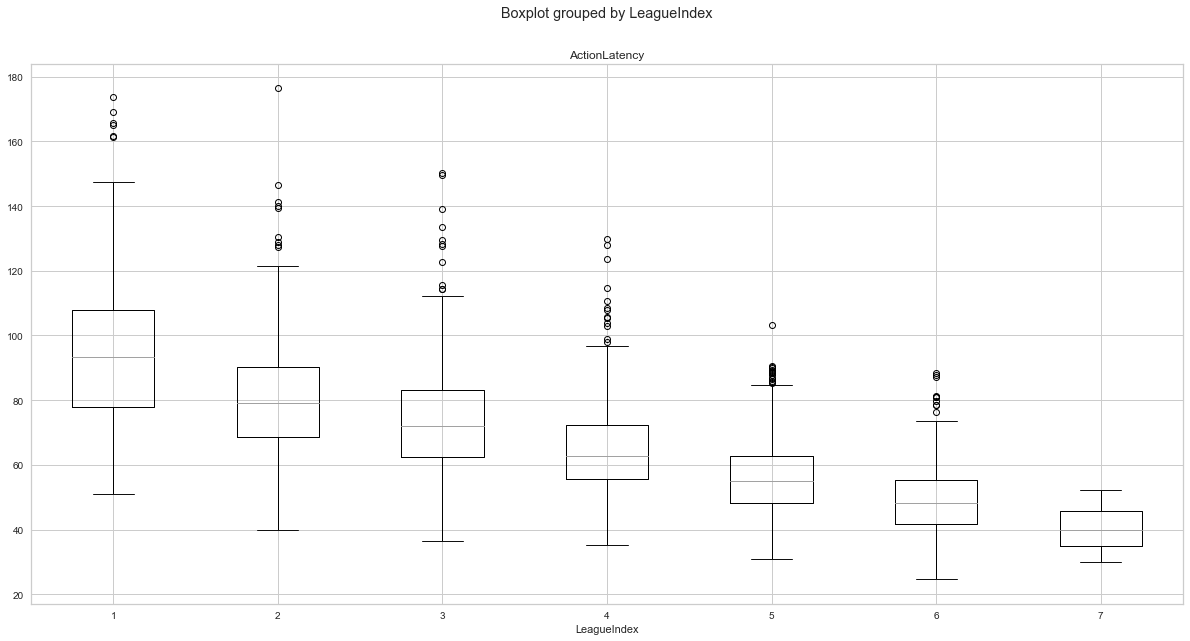

In [12]:
# plot the plot
data.boxplot(column='ActionLatency',by='LeagueIndex')

#### Box Plot 2, League Index and APM

C:\Users\longr\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


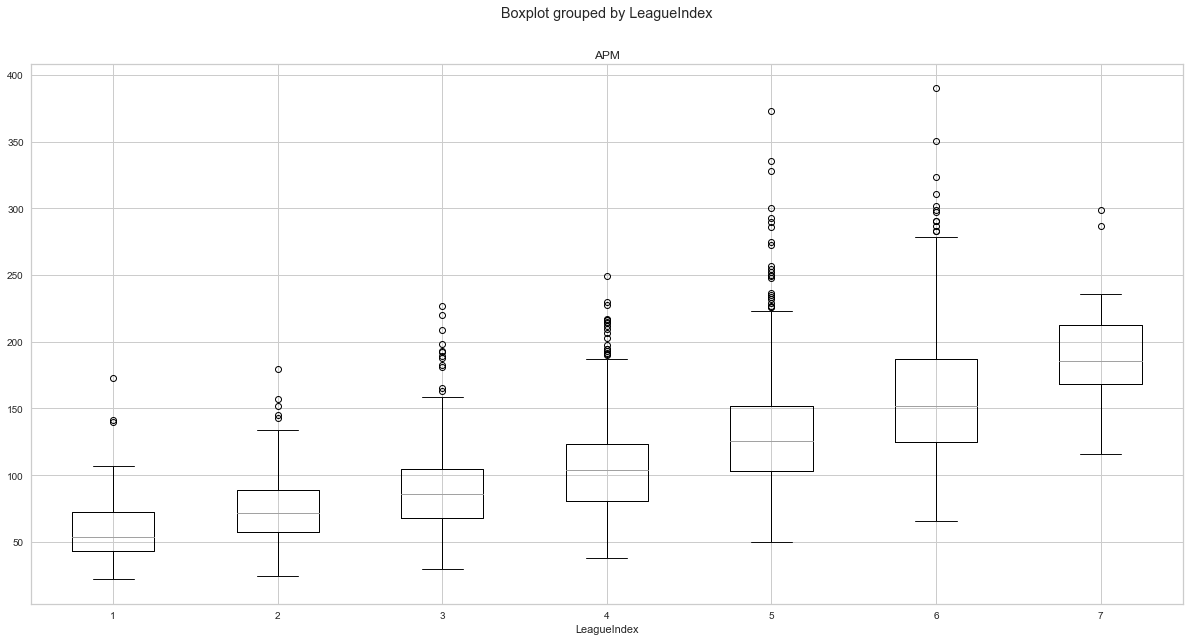

In [13]:
# plot the plot
data.boxplot(column='APM',by='LeagueIndex')

#### Box Plot 3, League Index and Age

C:\Users\longr\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


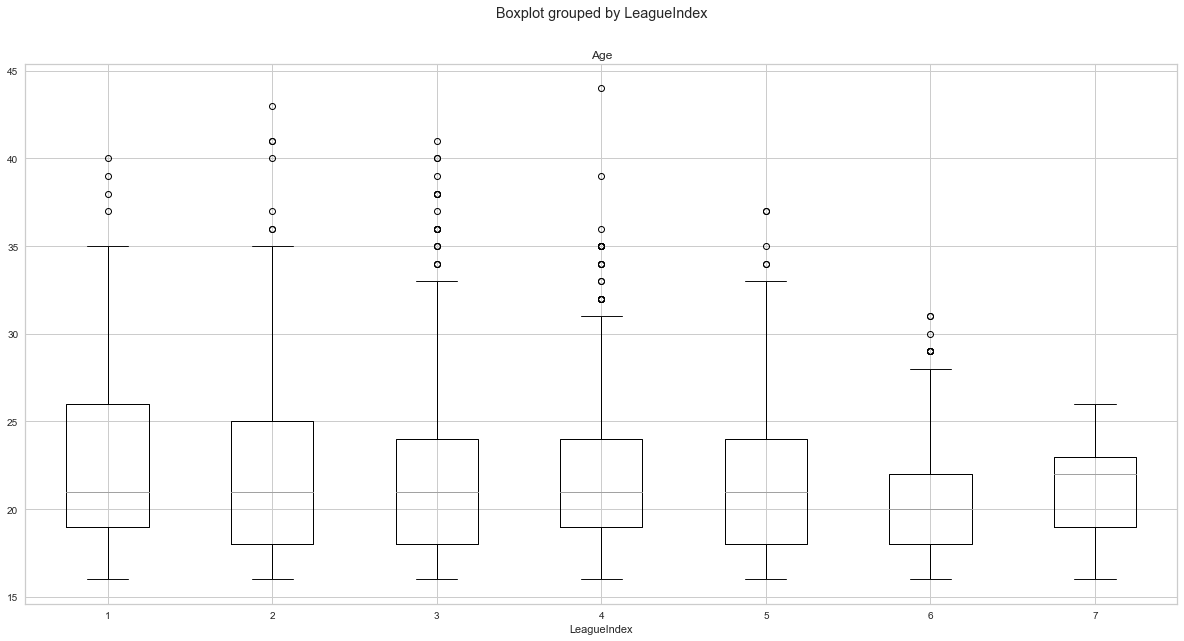

In [14]:
# plot the plot
data.boxplot(column='Age',by='LeagueIndex')

#### Linear Regression 1
##### Actions in PAC and Actions Per Minute (APM)

In [15]:
#data = pd.read_csv('data.csv')  # load data set
X2 = data.APM.values.reshape(-1, 1)  # values converts it into a numpy array
Y2 = data.ActionsInPAC.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X2, Y2)  # perform linear regression
Y_pred = linear_regressor.predict(X2)  # make predictions

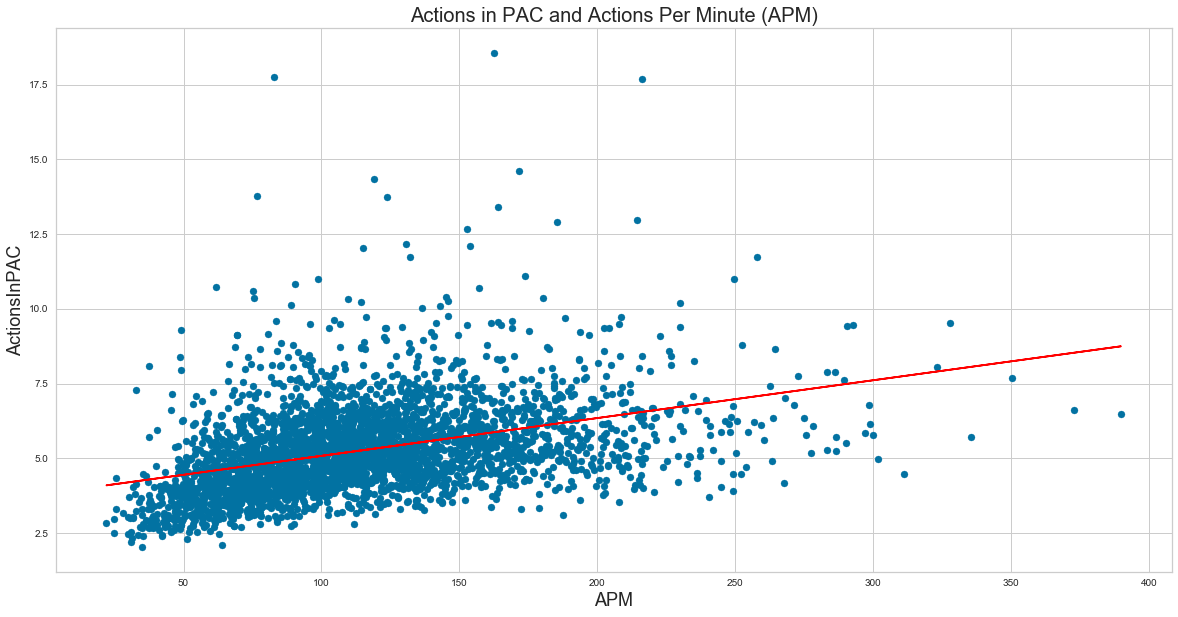

In [16]:
plt.title('Actions in PAC and Actions Per Minute (APM)', fontsize=20) #sets title
plt.xlabel('APM', fontsize=18)  #sets x label and size
plt.ylabel('ActionsInPAC', fontsize=18);  #sets y label and size

# plot the plot
plt.scatter(X2, Y2)
plt.plot(X2, Y_pred, color='red')
plt.show()

#### Linear Regression 2
##### Age and Actions Per Minute (APM)

In [17]:
#data = pd.read_csv('data.csv')  # load data set
X3 = data.Age.values.reshape(-1, 1)  # values converts it into a numpy array
Y3 = data.APM.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X3, Y3)  # perform linear regression
Y2_pred = linear_regressor.predict(X3)  # make predictions

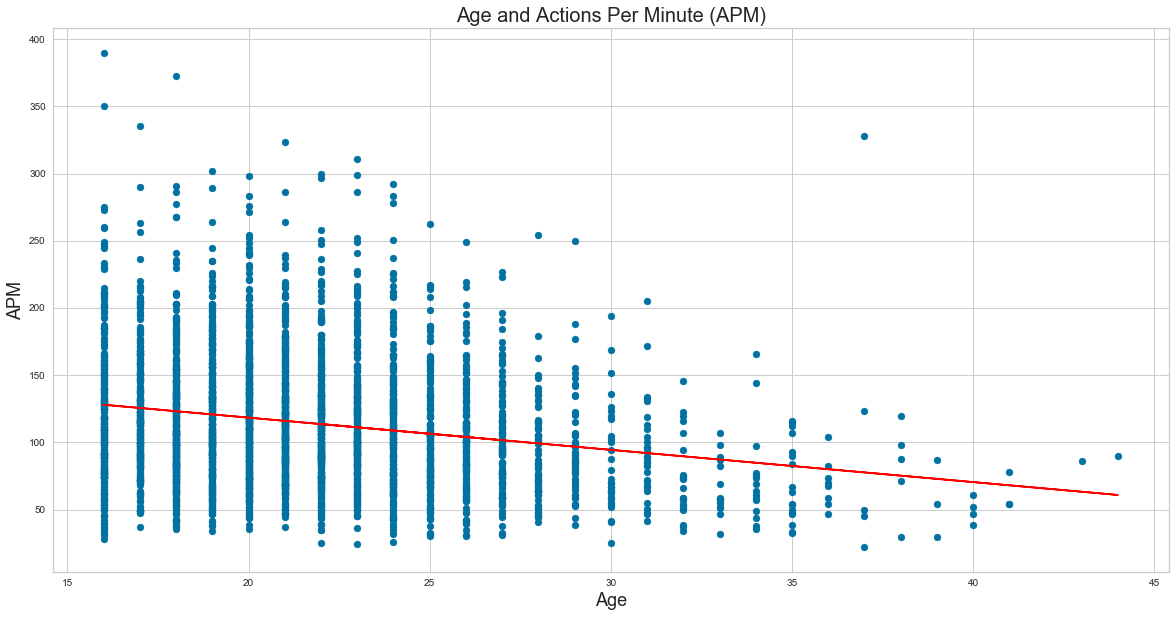

In [18]:
plt.title('Age and Actions Per Minute (APM)', fontsize=20) #sets title
plt.xlabel('Age', fontsize=18)  #sets x label and size
plt.ylabel('APM', fontsize=18);  #sets y label and size

# plot the plot
plt.scatter(X3, Y3)
plt.plot(X3, Y2_pred, color='red')
plt.show()

#### Linear Regression 3
##### Age and Actions in PAC

In [19]:
#data = pd.read_csv('data.csv')  # load data set
X4 = data.Age.values.reshape(-1, 1)  # values converts it into a numpy array
Y4 = data.ActionsInPAC.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X4, Y4)  # perform linear regression
Y3_pred = linear_regressor.predict(X4)  # make predictions

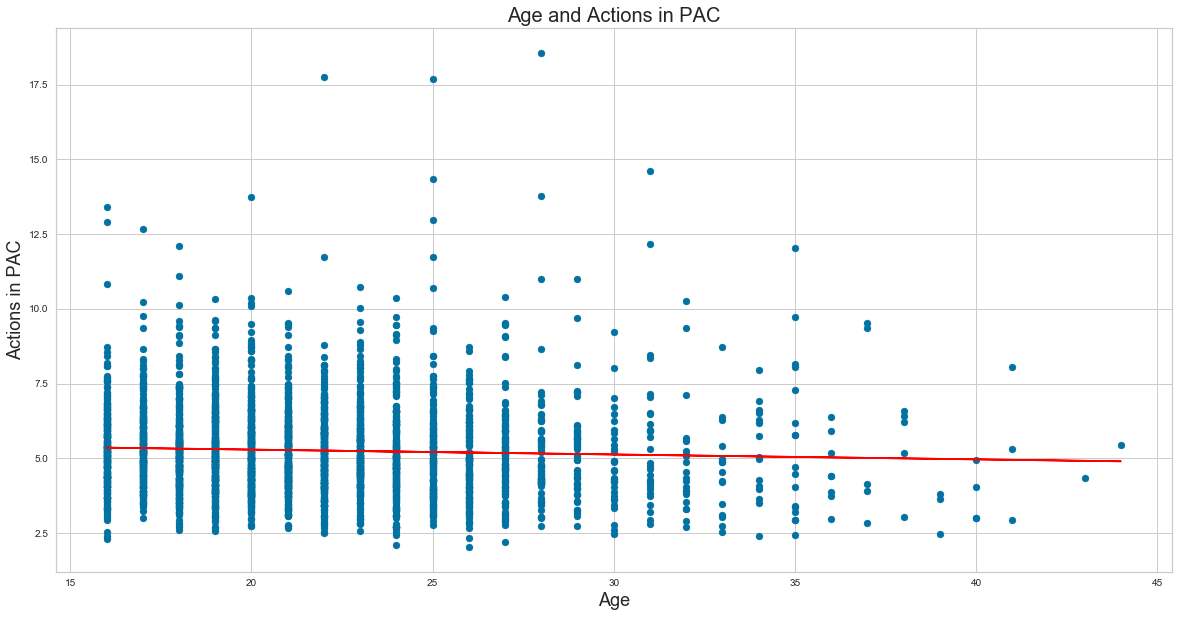

In [20]:
plt.title('Age and Actions in PAC', fontsize=20) #sets title
plt.xlabel('Age', fontsize=18)  #sets x label and size
plt.ylabel('Actions in PAC', fontsize=18);  #sets y label and size

# plot the plot
plt.scatter(X4, Y4)
plt.plot(X4, Y3_pred, color='red')
plt.show()

#### Stacked Bar Chart, League Index by Over/Under 25

In [21]:
# make df for the chart
agedf=data[['LeagueIndex','AgeCat']]

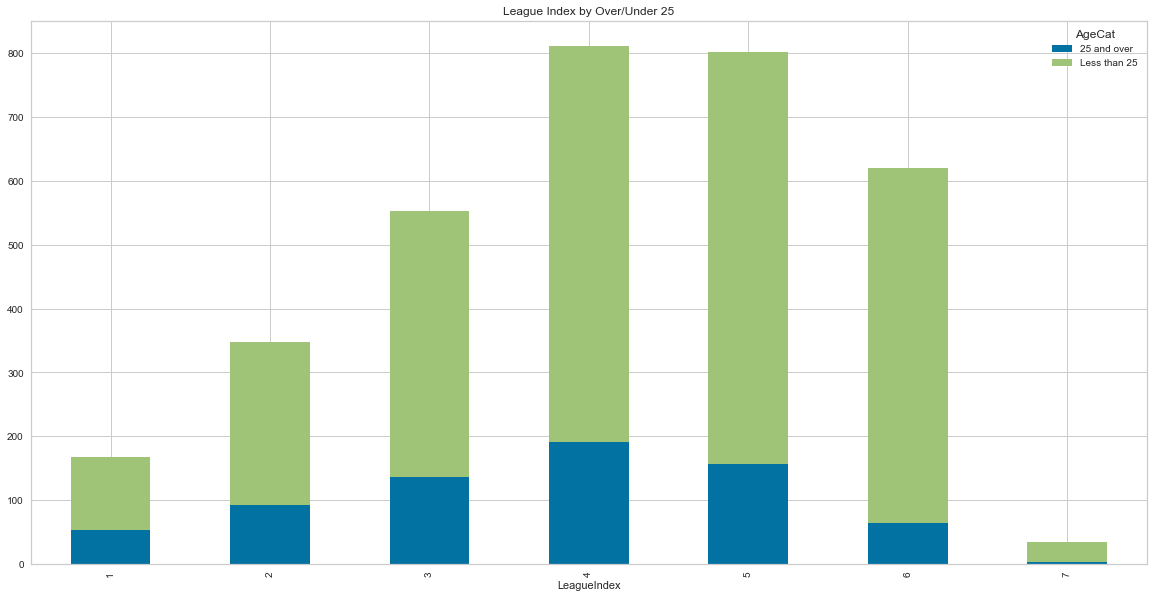

In [22]:
# plot the chart
pd.crosstab(agedf['LeagueIndex'], agedf['AgeCat']).plot(kind='bar', stacked=True, title='League Index by Over/Under 25')

In [23]:
# drop this feature, won't be using
data = data.drop(columns=['AgeCat'])

# Week 7 - Milestone 2

In Milestone 2, you should drop any features that are not useful for your model building. You should explain and justify why the feature dropped is not useful. You should address any missing data issues. Build any new features that you need for your model, e.g., create dummy variables for categorical features if necessary. Explain your process at each step. You can use any methods/tools you think are most appropriate. Again, keep in mind that this may look very different from what is done in the Titanic tutorial case study. You should do what makes sense for your project. Be careful to avoid data snooping in these steps.

#### Feedback from prior week's submission: 
*I would like to see more of an explanation of what some of these variables represent, e.g., APM and PAC. These values are not well-known quantities to a common person, so they need some background information.*

#### Variable Definitions

**LeagueIndex**:  
**1** = Bronze,  
**2** = Silver,  
**3** = Gold,  
**4** = Platinum,  
**5** = Diamond,  
**6** = Master,  
**7** = GrandMaster,  
**8** = Professional,  

**PAC** = Perception Action Cycle = a period of time where players are fixating and acting at a particular location. Typical game play takes an overhead approach to a 'map', like a chessboard. The game occurrs in real-time, unlike chesss, so players get to move and react throughout the match. The entire map is not visble on the screen at one time, so a player must 'scroll' through to other areas.

**APM** = Actions Per Minute = measure of how many clicks and key presses a player can perform in sixty seconds

**Age** = Age of the player

**TotalHours** = Total hours spent playing the game

**HoursPerWeek** = Number of hours spent playing the game per week

*Other variables in the dataset defined below*

##### Feedback from prior week's submission: 
*Your EDA looks pretty good overall, but I woud like to see a bit more of a clearer direction of what you want to predict/model with your project. This is not clear to me at this point.*

I plan to evaluate which variables have the greatest influence on leauge placement, PAC, APM, Age, TotalHours, or HoursPerWeek.

In [24]:
# review dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3337
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3334 non-null   int64  
 1   LeagueIndex           3334 non-null   int64  
 2   Age                   3334 non-null   int64  
 3   HoursPerWeek          3334 non-null   int64  
 4   TotalHours            3334 non-null   int64  
 5   APM                   3334 non-null   float64
 6   SelectByHotkeys       3334 non-null   float64
 7   AssignToHotkeys       3334 non-null   float64
 8   UniqueHotkeys         3334 non-null   int64  
 9   MinimapAttacks        3334 non-null   float64
 10  MinimapRightClicks    3334 non-null   float64
 11  NumberOfPACs          3334 non-null   float64
 12  GapBetweenPACs        3334 non-null   float64
 13  ActionLatency         3334 non-null   float64
 14  ActionsInPAC          3334 non-null   float64
 15  TotalMapExplored     

#### Drop Features - You should drop any features that are not useful for your model building. You should explain and justify why the feature dropped is not useful.

##### Feedback from submission: 
*You may want to take a more systematic method of dropping features. I.e., use numerical methods rather than intutition. Some can clearly be dropped using domain knowledge but others are not so clear.*

Based on feedback from the Milestone 2 submission and further evaluation in Milestone 3, I commented out this 'dropping' process.

In [25]:
# redefined the dataframe with only the features to be used for modeling purposes.
# dropped features defined/reviewed/justified below
#data = data[['GameID','LeagueIndex','Age','HoursPerWeek','TotalHours','APM','NumberOfPACs']]

I dropped these features because they are subesets of APM or Actions Per Minute which is already being used. They may be further useful if 'APM' is determined to be a significant influence on leage placement.  

>**6**   SelectByHotkeys- Number of unit or building selections made using hotkeys per timestamp  
**7**   AssignToHotkeys - Number of units or buildings assigned to hotkeys per timestamp  
**8**   UniqueHotkeys - Number of unique hotkeys used per timestamp  
**9**   MinimapAttacks - Number of attack actions on minimap per timestamp  
**10**  MinimapRightClicks - number of right-clicks on minimap per timestamp   

I dropped these features because they are subsets of PAC is already being used. They may be further useful if 'NumberOfPACs' is determined to be a significant influence on league placement.  
>**12**  GapBetweenPACs - Mean duration in milliseconds between PACs  
**13**  ActionLatency - Mean latency from the onset of a PACs to their first action in milliseconds  
**14**  ActionsInPAC - Mean number of actions within each PAC  

These features are more closely aligned to strategy of play vs. basic mechanics. They may be further useful if there is limited to no influence of the other basic mechanic features.
>**15**  TotalMapExplored - The number of 24x24 game coordinate grids viewed by the player per timestamp  
**16**  WorkersMade - Number of SCVs, drones, and probes trained per timestamp.   
**17**  UniqueUnitsMade - Unique unites made per timestamp  
**18**  ComplexUnitsMade - Number of ghosts, infestors, and high templars trained per timestamp  
**19**  ComplexAbilitiesUsed - Abilities requiring specific targeting instructions used per timestamp  

I dropped this feature created during EDA as I will not persue an age analysis at this time.
>**20**  AgeCat


#### Missing Data - You should address any missing data issues.

In [26]:
data.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000
mean,4719.361428,4.119676,21.651770,15.911218,642.737852,114.434664,0.004006,0.000364,4.315237,0.000094,0.000380,0.003432,40.721924,64.231831,5.266628,22.113977,0.001031,6.541992,0.000060,0.000142
std,2657.930910,1.448511,4.208299,11.969630,594.570682,47.938799,0.004698,0.000210,2.332649,0.000159,0.000359,0.000965,17.060120,19.034038,1.501259,7.443208,0.000520,1.859901,0.000112,0.000266
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2423.250000,3.000000,19.000000,8.000000,300.000000,79.213200,0.001244,0.000202,3.000000,0.000000,0.000139,0.002742,29.331450,50.934650,4.261050,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4786.000000,4.000000,21.000000,12.000000,500.000000,107.040000,0.002440,0.000348,4.000000,0.000039,0.000278,0.003375,37.058900,61.309650,5.087050,22.000000,0.000904,6.000000,0.000000,0.000021
75%,6995.750000,5.000000,24.000000,20.000000,800.000000,140.000400,0.004927,0.000493,6.000000,0.000113,0.000508,0.004002,48.510425,74.040975,6.027350,27.000000,0.001258,8.000000,0.000087,0.000183
max,9271.000000,7.000000,44.000000,168.000000,10260.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [27]:
#if they've played then hours per week can't be zero, review the records with 0 hours per week
data.loc[data['HoursPerWeek'] == 0]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1036,2985,6,16,0,365,86.1174,0.000397,0.00033,3,0.0,0.000198,0.002544,54.3158,66.026,6.1299,11,0.001917,4,0.0,0.0


In [28]:
# this record had 365 hours total and zero per week. use 50% as plug value
data.at[1036,'HoursPerWeek']=12
# confirm change
display(data.iloc[1035])

GameID                  2985.000000
LeagueIndex                6.000000
Age                       16.000000
HoursPerWeek              12.000000
TotalHours               365.000000
APM                       86.117400
SelectByHotkeys            0.000397
AssignToHotkeys            0.000330
UniqueHotkeys              3.000000
MinimapAttacks             0.000000
MinimapRightClicks         0.000198
NumberOfPACs               0.002544
GapBetweenPACs            54.315800
ActionLatency             66.026000
ActionsInPAC               6.129900
TotalMapExplored          11.000000
WorkersMade                0.001917
UniqueUnitsMade            4.000000
ComplexUnitsMade           0.000000
ComplexAbilitiesUsed       0.000000
Name: 1036, dtype: float64

In [29]:
# this person claims 168 hours in a week, which is 24/7, use 50% as plug value
data.loc[data['HoursPerWeek'] == 168]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
689,2000,6,16,168,1260,233.3058,0.017521,0.000744,10,0.000178,0.000235,0.005137,25.5962,38.9165,5.0961,43,0.001027,10,0.000315,0.000502


In [30]:
data.at[689,'HoursPerWeek']=12
display(data.iloc[689])

GameID                  2000.000000
LeagueIndex                6.000000
Age                       16.000000
HoursPerWeek              12.000000
TotalHours              1260.000000
APM                      233.305800
SelectByHotkeys            0.017521
AssignToHotkeys            0.000744
UniqueHotkeys             10.000000
MinimapAttacks             0.000178
MinimapRightClicks         0.000235
NumberOfPACs               0.005137
GapBetweenPACs            25.596200
ActionLatency             38.916500
ActionsInPAC               5.096100
TotalMapExplored          43.000000
WorkersMade                0.001027
UniqueUnitsMade           10.000000
ComplexUnitsMade           0.000315
ComplexAbilitiesUsed       0.000502
Name: 689, dtype: float64

In [31]:
# does not seem to be any more missing values
data.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000
mean,4719.361428,4.119676,21.651770,15.868026,642.737852,114.434664,0.004006,0.000364,4.315237,0.000094,0.000380,0.003432,40.721924,64.231831,5.266628,22.113977,0.001031,6.541992,0.000060,0.000142
std,2657.930910,1.448511,4.208299,11.673192,594.570682,47.938799,0.004698,0.000210,2.332649,0.000159,0.000359,0.000965,17.060120,19.034038,1.501259,7.443208,0.000520,1.859901,0.000112,0.000266
min,52.000000,1.000000,16.000000,2.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2423.250000,3.000000,19.000000,8.000000,300.000000,79.213200,0.001244,0.000202,3.000000,0.000000,0.000139,0.002742,29.331450,50.934650,4.261050,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4786.000000,4.000000,21.000000,12.000000,500.000000,107.040000,0.002440,0.000348,4.000000,0.000039,0.000278,0.003375,37.058900,61.309650,5.087050,22.000000,0.000904,6.000000,0.000000,0.000021
75%,6995.750000,5.000000,24.000000,20.000000,800.000000,140.000400,0.004927,0.000493,6.000000,0.000113,0.000508,0.004002,48.510425,74.040975,6.027350,27.000000,0.001258,8.000000,0.000087,0.000183
max,9271.000000,7.000000,44.000000,140.000000,10260.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


#### Build New Features -Build any new features that you need for your model, e.g., create dummy variables for categorical features if necessary.

At this point I do not see the need to create or build any features. I created a over/under Age 25 for the EDA portion, but dropped as I was merely curious to the composition of the leagues based on age. I will re-evaluate if Age becomes a influencial feature as the project progresses.

# Week 8 & 9 - Milestone 3 & 4

In Milestone 3, you will begin the process of model selection and evaluation. In addition, write step-by-step instructions for performing the model evaluation and selection part of your case study.  

In Milestone 3, you should build and evaluate at least one model. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are choosing the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for the context of your problem. 

Milestone 4 does not have any new requirements to the project but will give you some time to polish and refine your project in preparation for final submission. This is a great point in the project to solicit feedback and bounce final ideas off your instructor and peers. This will be your last opportunity to get feedback before your final project milestone/final submission is due.

Start with simple linear regression to create baseline review of features

In [32]:
# set dependent and independents
X = data[['Age', 'HoursPerWeek','TotalHours','APM','NumberOfPACs']]
y = data['LeagueIndex']

In [33]:
#import library/module
from sklearn import linear_model
import statsmodels.api as sm

In [34]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

In [35]:
# fit & predict model
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

In [36]:
#set model summary as variable to print
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            LeagueIndex   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     619.7
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        07:34:09   Log-Likelihood:                -4868.6
No. Observations:                3334   AIC:                             9749.
Df Residuals:                    3328   BIC:                             9786.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7538      0.131      5.746   

### After review of the Regression Results, I don't think I have the correct features  

The NumberOfPACs coefficient shows a strong relationship with the Y. HoursPerWeek has the highest Pvalue, but is not strong.

Need to re-evaluate and adjust the Milestone 2 'dropping' process. I commented out the 'dropping feature' step in Milestone 2 above and used the below for finding the important features

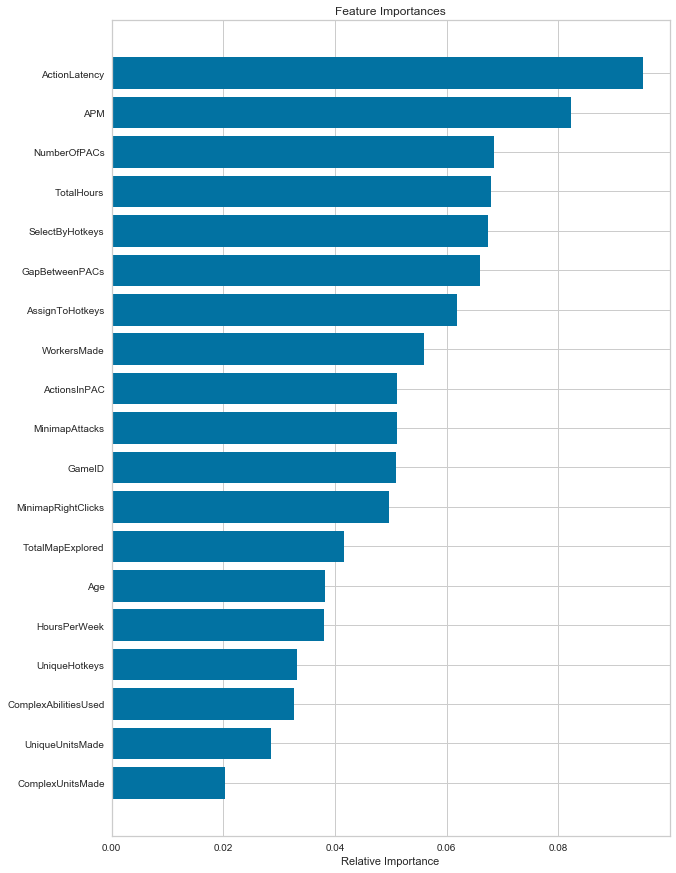

In [37]:
#
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
#
# https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d
#

# Drops League Index, split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('LeagueIndex', axis=1), data['LeagueIndex'], test_size=0.20, random_state=0)

# fitting the model using randomforestclassifier
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# plotting feature importances
features = data.drop('LeagueIndex', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Need to re-evaluate the features based on the above.

In [38]:
#
# Use this section of code to comment in/out various feature sets to explore, didn't find material differences.
#
# feature set 1
feature_names = ['ActionLatency','APM','NumberOfPACs','TotalHours','SelectByHotkeys','GapBetweenPACs','AssignToHotkeys','WorkersMade']
X = data[feature_names]
y = data['LeagueIndex']

# feature set 2
#feature_names = ['ActionLatency','APM','NumberOfPACs','TotalHours','SelectByHotkeys','GapBetweenPACs']
#X = data[feature_names]
#y = data['LeagueIndex']

# feature set 3
#feature_names = ['ActionLatency','APM','NumberOfPACs','TotalHours','SelectByHotkeys']
#X = data[feature_names]
#y = data['LeagueIndex']

# feature set 4 - Original Features I thought would be influencial
#feature_names = ['Age', 'HoursPerWeek','TotalHours','APM','NumberOfPACs']
#X = data[feature_names]
#y = data['LeagueIndex']



In [39]:
# 
# Create test and train sets, scale sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=data['LeagueIndex'],random_state=0)

# need to scale data because not all attributes have same numerical values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
# print number of train & test
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in test set:", X_test.shape[0])

No. of samples in training set:  2000
No. of samples in test set: 1334


## Model Testing

I will be using Classification Models, as I am trying to determine the influence the selected features have on a multi-class label target (League Index).

Logistic Regression is primarily a binary classifier - not the best for this application, but ran for exploratory purposes. Accuracy is poor.

In [41]:
# Logistic Regression Classification model
#
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#
#Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.39
Accuracy of Logistic regression classifier on test set: 0.40


KNN uses class based voting, so appropriate for my multi-class target. Accuracy on training and test isn't that great, will discontinue further evaulation.

In [42]:
#Build K-Nearest Neighbors Model
#
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.56
Accuracy of K-NN classifier on test set: 0.36


Decision Tree - used for classification to predict the value of a target variable based on decisions inferred from data features. Training accuracy was fantastic for this model, while the test accuracy is not much better than KNN.

In [43]:
#Build Decision Tree Model
#
# https://scikit-learn.org/stable/modules/tree.html#classification
#
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.30


Random Forest - Used for multi-class, each tree built from sample drawn with replacement from training set. Training results nearly identical to Decision Tree Model, with test accuracy slightly higher.

In [44]:
#Build Random Forest Model
#
# https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees
#
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 0.99
Accuracy of Random Forest Classifier on test set: 0.35


## Evaluation
Based on the models ran above, the Decision Tree Classifier and Random Forest Classifier were chosen for further evaluation. Confusion matrix, precision, recall, f1 scores follow.

In [45]:
#
# Decision Tree Classfier
#
pred = dtc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 21  22  10   9   5   0   0]
 [ 28  28  35  34  12   2   0]
 [ 20  44  55  61  30  11   0]
 [  7  34  62  98  85  37   1]
 [  2  15  33  95 101  68   7]
 [  0   1  11  36  93  91  16]
 [  0   0   0   0   0   9   5]]
              precision    recall  f1-score   support

           1       0.27      0.31      0.29        67
           2       0.19      0.20      0.20       139
           3       0.27      0.25      0.26       221
           4       0.29      0.30      0.30       324
           5       0.31      0.31      0.31       321
           6       0.42      0.37      0.39       248
           7       0.17      0.36      0.23        14

    accuracy                           0.30      1334
   macro avg       0.27      0.30      0.28      1334
weighted avg       0.30      0.30      0.30      1334



In [46]:
#
#random forest
#
pred = rfc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 25  25  12   5   0   0   0]
 [ 17  42  37  33   9   1   0]
 [ 15  43  61  77  23   2   0]
 [  7  23  69 118  86  21   0]
 [  1   5  26 105 114  70   0]
 [  1   0   4  35  95 108   5]
 [  0   0   0   0   2  12   0]]
              precision    recall  f1-score   support

           1       0.38      0.37      0.38        67
           2       0.30      0.30      0.30       139
           3       0.29      0.28      0.28       221
           4       0.32      0.36      0.34       324
           5       0.35      0.36      0.35       321
           6       0.50      0.44      0.47       248
           7       0.00      0.00      0.00        14

    accuracy                           0.35      1334
   macro avg       0.31      0.30      0.30      1334
weighted avg       0.35      0.35      0.35      1334



# Summary
Both models are overfitting due to the strong performance on the training data but not on the evaluation sets.

Precision (identify only correct instances for each class) and recall (ability to find all correct instances per class) are very low for all classes in both models. Overall, Random Forest performed better than the Decision Tree Classifier both on the macro average and weighted average scores.

The support summary indicates there is an imbalance and either additional data or further techniques may be needed to improve model results.